### ANÁLISE E PREVISÃO DA ARRECADAÇÃO FEDERAL

Autor: GABRIEL RODRIGUES  MARCOLINI

In [1]:
#pip install ipympl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset_path = '.\\dataset\\CSV\\'
filename_input = 'arrecadacao-TOTAL-GERAL-2015-2020.csv'
month_tp = ('jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez')
macrorregiao = {'AC':'Norte',
                'AL':'Nordeste',
                'AP':'Norte',
                'AM':'Norte',
                'BA':'Nordeste',
                'CE':'Nordeste',
                'DF':'Centro-Oeste',
                'ES':'Sudeste',
                'GO':'Centro-Oeste',
                'MA':'Nordeste',
                'MT':'Centro-Oeste',
                'MS':'Centro-Oeste',
                'MG':'Sudeste',
                'PA':'Norte',
                'PB':'Nordeste',
                'PR':'Sul',
                'PE':'Nordeste',
                'PI':'Nordeste',
                'RJ':'Sudeste',
                'RN':'Nordeste',
                'RS':'Sul',
                'RO':'Norte',
                'RR':'Centro-Oeste',
                'SC':'Sul',
                'SP':'Sudeste',
                'SE':'Nordeste',
                'TO':'Norte'}


In [4]:
tb_in = pd.read_csv(dataset_path+filename_input)
tb_in

,RECEITAS,UF,VALOR,DATA
0,TOTAL GERAL,AC,9.974189e+07,2015-01-31
1,TOTAL GERAL,AL,3.050410e+08,2015-01-31
2,TOTAL GERAL,AM,1.161982e+09,2015-01-31
3,TOTAL GERAL,AP,8.380584e+07,2015-01-31
4,TOTAL GERAL,BA,2.202375e+09,2015-01-31
...,...,...,...,...
1777,TOTAL GERAL,RS,4.443686e+09,2020-06-30
1778,TOTAL GERAL,SC,3.654058e+09,2020-06-30
1779,TOTAL GERAL,SE,3.253779e+08,2020-06-30
1780,TOTAL GERAL,SP,3.363790e+10,2020-06-30


In [5]:
tb_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RECEITAS  1782 non-null   object 
 1   UF        1782 non-null   object 
 2   VALOR     1782 non-null   float64
 3   DATA      1782 non-null   object 
dtypes: float64(1), object(3)
memory usage: 55.8+ KB


In [6]:
tb_in['DATA'] = pd.to_datetime(tb_in['DATA'],format="%Y/%m/%d")

In [7]:
tb_in.describe(include='all')

,RECEITAS,UF,VALOR,DATA
count,1782,1782,1.782000e+03,1782
unique,1,27,NaN,66
top,TOTAL GERAL,AP,NaN,2015-01-31 00:00:00
freq,1782,66,NaN,27
first,NaN,NaN,NaN,2015-01-31 00:00:00
last,NaN,NaN,NaN,2020-06-30 00:00:00
mean,NaN,NaN,4.216563e+09,NaN
std,NaN,NaN,9.155748e+09,NaN
min,NaN,NaN,6.389014e+07,NaN
25%,NaN,NaN,3.848164e+08,NaN


In [8]:
tb_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   RECEITAS  1782 non-null   object        
 1   UF        1782 non-null   object        
 2   VALOR     1782 non-null   float64       
 3   DATA      1782 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 55.8+ KB


In [9]:
pd.unique(tb_in['DATA'].dt.month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
pd.unique(tb_in['DATA'].dt.year)

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [11]:
pd.unique(tb_in['UF'])

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [12]:
tb_in.groupby([tb_in['DATA'].dt.year, tb_in['DATA'].dt.month]).sum()

VALOR
DATA DATA              
2015 1     1.252819e+11
     2     8.998163e+10
     3     9.411215e+10
     4     1.092412e+11
     5     9.150023e+10
...                 ...
2020 2     1.164304e+11
     3     1.097175e+11
     4     1.011542e+11
     5     7.741535e+10
     6     8.625819e+10

[66 rows x 1 columns]

In [13]:
tb_in.groupby([tb_in['DATA'].dt.month, tb_in['DATA'].dt.year]).sum()['VALOR'].unstack()

DATA,2015,2016,2017,2018,2019,2020
DATA,,,,,,
1,1.252819e+11,1.293849e+11,1.373917e+11,1.556195e+11,1.604255e+11,1.749906e+11
2,8.998163e+10,8.785075e+10,9.235830e+10,1.051224e+11,1.150616e+11,1.164304e+11
3,9.411215e+10,9.577854e+10,9.899421e+10,1.056592e+11,1.098541e+11,1.097175e+11
4,1.092412e+11,1.108952e+11,1.180465e+11,1.308065e+11,1.390296e+11,1.011542e+11
5,9.150023e+10,9.521871e+10,9.769383e+10,1.061924e+11,1.132780e+11,7.741535e+10
6,9.709070e+10,9.812888e+10,1.040998e+11,1.108550e+11,1.199464e+11,8.625819e+10
7,1.048680e+11,1.074157e+11,1.099481e+11,1.296149e+11,1.377345e+11,NaN
8,9.373827e+10,9.180810e+10,1.042062e+11,1.097511e+11,1.199513e+11,NaN
9,9.523929e+10,9.476999e+10,1.055949e+11,1.106636e+11,1.139335e+11,NaN


In [14]:
# Ajustar parâmetros de plotagem
#plt.rcParams.keys()
def plot_padrao():
    plt.rcParams["text.color"] = 'Blue'
    plt.rcParams["axes.titlesize"] = 20
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams["xtick.labelsize"] = 12
    plt.rcParams["ytick.labelsize"] = 12
    plt.rcParams["legend.fontsize"] = 12
    plt.rcParams["figure.figsize"] = [15, 6]
    plt.rcParams["lines.linewidth"] = 2.0

plot_padrao()

In [15]:
tb_in.groupby([tb_in['DATA']]).sum()['VALOR']

DATA
2015-01-31    1.252819e+11
2015-02-28    8.998163e+10
2015-03-31    9.411215e+10
2015-04-30    1.092412e+11
2015-05-31    9.150023e+10
                  ...     
2020-02-29    1.164304e+11
2020-03-31    1.097175e+11
2020-04-30    1.011542e+11
2020-05-31    7.741535e+10
2020-06-30    8.625819e+10
Name: VALOR, Length: 66, dtype: float64

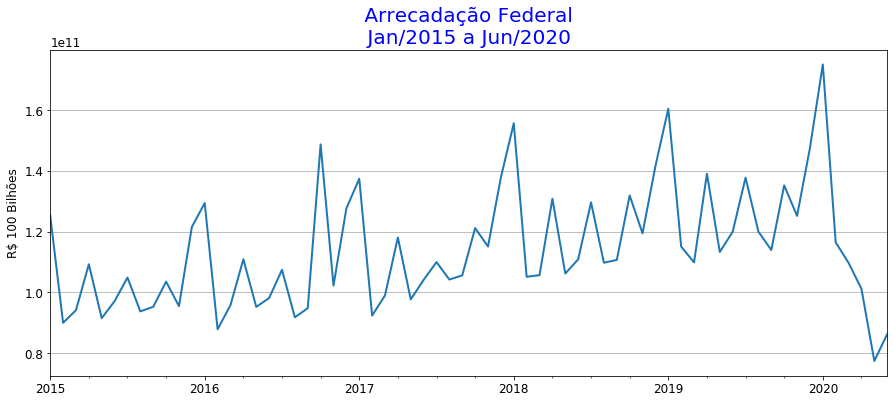

In [16]:
group_data = tb_in.groupby([tb_in['DATA']]).sum()['VALOR']
fig, ax = plt.subplots()
group_data.plot(ax=ax)
ax.set_xlabel(None)
ax.set_ylabel('R$ 100 Bilhões')
ax.set_title(" Arrecadação Federal \n Jan/2015 a Jun/2020 ")
ax.grid(True,axis='y')
plt.show()

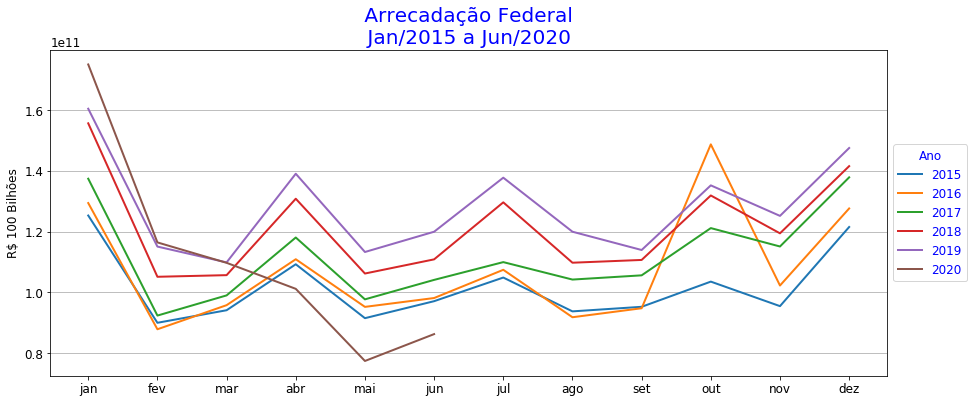

In [17]:
group_data = tb_in.groupby([tb_in['DATA'].dt.month, tb_in['DATA'].dt.year]).sum()['VALOR'].unstack()
fig, ax = plt.subplots()
group_data.plot(ax=ax)
ax.set_xlabel(None)
ax.set_ylabel('R$ 100 Bilhões')
ax.set_title(" Arrecadação Federal \n Jan/2015 a Jun/2020 ")
ax.legend(title="Ano",title_fontsize=12,loc='center left',bbox_to_anchor=(1, .5))
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(month_tp)
ax.grid(True,axis='y')
plt.show()

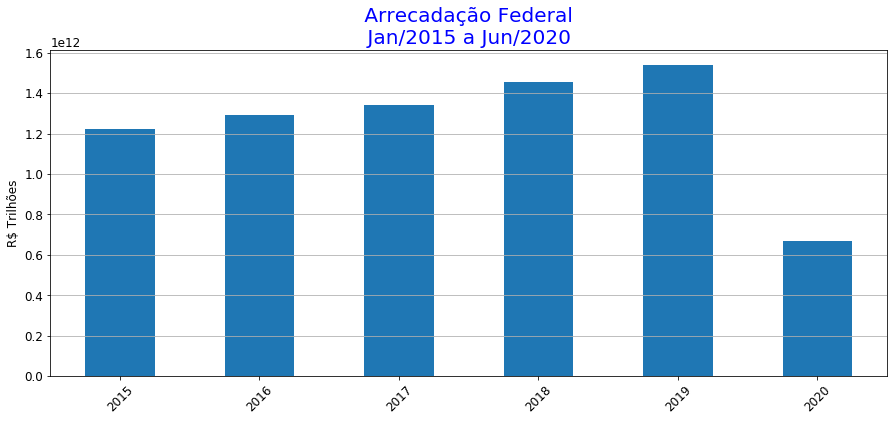

In [18]:
group_data = tb_in.groupby([tb_in['DATA'].dt.year]).sum()['VALOR']
fig, ax = plt.subplots()
group_data.plot.bar()
ax.set_xlabel(None)
ax.set_ylabel('R$ Trilhões')
ax.set_title(" Arrecadação Federal \n Jan/2015 a Jun/2020 ")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.grid(True,axis='y')
plt.show()

In [19]:
group_data=pd.DataFrame(tb_in.groupby([tb_in['DATA'].dt.year]).sum()['VALOR'])
group_data['INCREMENTO']=group_data.pct_change()
group_data['VALOR']/=1000000000
group_data['VALOR']=group_data['VALOR'].round(2)
group_data.round(2).reset_index().style.hide_index()

DATA,VALOR,INCREMENTO
2015,1221.550000,nan
2016,1289.800000,0.060000
2017,1342.410000,0.040000
2018,1457.110000,0.090000
2019,1537.080000,0.050000
2020,665.970000,-0.570000


In [20]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [21]:
left = pd.DataFrame(tb_in.groupby([tb_in['UF']]).sum()['VALOR'])
right = pd.DataFrame.from_dict(macrorregiao, orient='index')
right.index.rename('UF',inplace=True)
result = pd.merge(left,right,how='inner',on='UF')
result.columns=['VALOR','REGIAO']

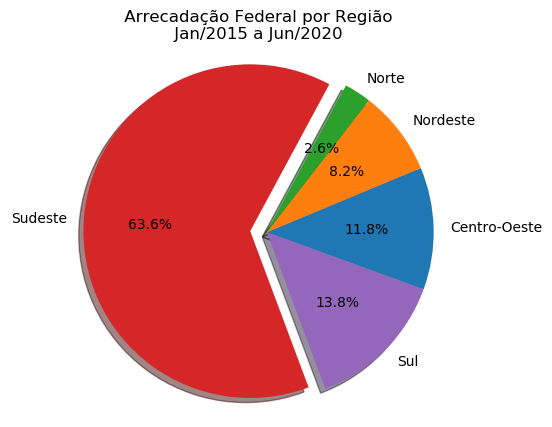

In [22]:
plt.rcParams.update(plt.rcParamsDefault)
#plt.style.use('tableau-colorblind10')

group_data = result.groupby([result['REGIAO']]).sum()['VALOR']
explode = (0, 0, 0, 0.1, 0)
fig, ax = plt.subplots()
group_data.plot.pie(explode=explode,autopct='%1.1f%%',shadow=True,startangle=340)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(" Arrecadação Federal por Região \n Jan/2015 a Jun/2020 ")
ax.axis('equal')
#ax.legend(title="Região",title_fontsize=12,loc='center left',bbox_to_anchor=(1.05, .5))
plt.show()

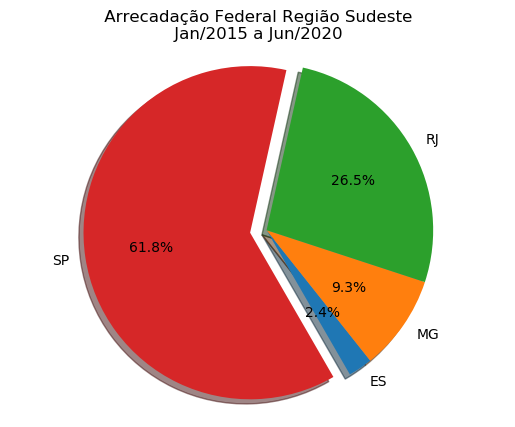

In [23]:
result.reset_index(inplace=True)
group_data = result[result['REGIAO']=='Sudeste'].groupby([result['UF']]).sum()['VALOR']
explode = (0, 0, 0, 0.1,)
fig, ax = plt.subplots()
group_data.plot.pie(explode=explode,autopct='%1.1f%%',shadow=True,startangle=300)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(" Arrecadação Federal Região Sudeste \n Jan/2015 a Jun/2020 ")
ax.axis('equal')
plt.show()

In [24]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn')
plot_padrao()

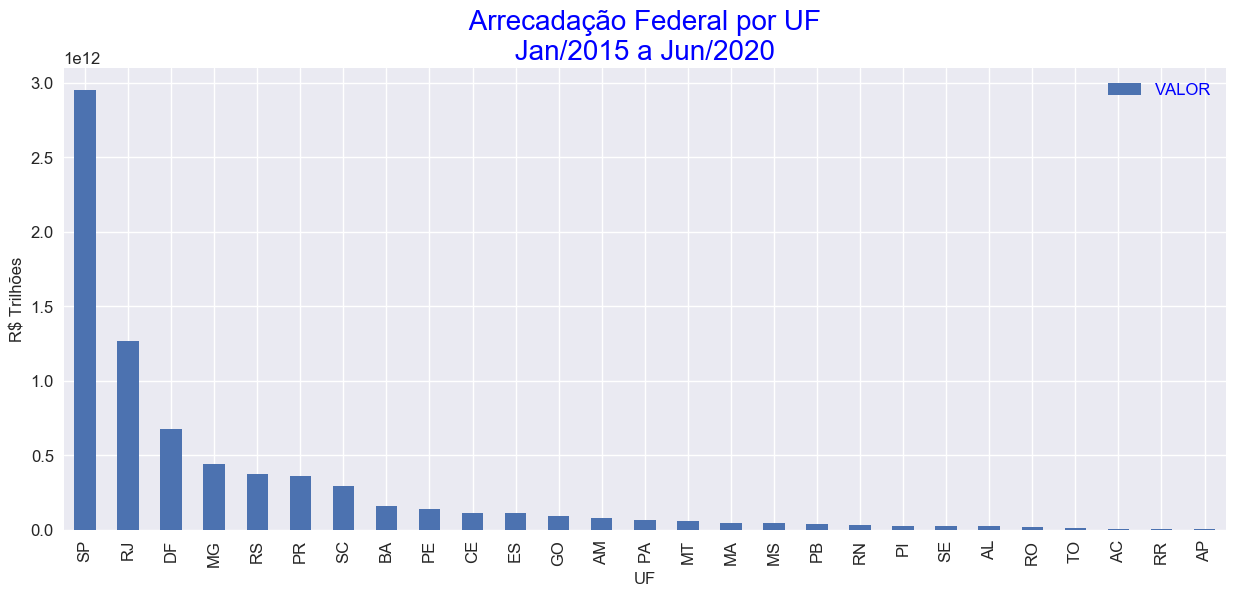

In [25]:
group_data = pd.DataFrame(tb_in.groupby([tb_in['UF']]).sum()['VALOR']).sort_values(['VALOR'], ascending=False)
group_data.plot.bar()
plt.title(" Arrecadação Federal por UF \n Jan/2015 a Jun/2020 ")
plt.ylabel('R$ Trilhões')
plt.show()